## Extract Polydispersed Sphere SAXS curve from GSD file

In [1]:
#import necessary modules
import sys
sys.path.append('../gsd2sas')
import os
import numpy as np
import matplotlib.pyplot as plt
from sasintensity import SphereIntensity
from utils import load_types
import matplotlib.ticker as ticker

In [2]:
# Create an instance of the SphereIntensity class, corresponding to SAXS curve of spheres
# Load types file
types = load_types('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/CSSAS Digital Twin/Spectra Extraction from GSD/SAXS/Bare AuNP/Poly/LR/indices.txt')
# SLD of samples and solvent can be found in literature
au = SphereIntensity(volume_fraction=0.01, sld_sample=118e-6, sld_solvent=9.44e-6, types=types)

In [3]:
au.set_form_factor(radius=[0.8268, 1.1732])
gsd = '/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/CSSAS Digital Twin/Spectra Extraction from GSD/SAXS/Bare AuNP/Poly/LR/N8000_phi0.001000_epsD7.10_delta0.25_epsY0.73_lamb2.24_poly0.10.gsd'
au.set_structure_factor(gsd_path=gsd, N_grid=300, frames = [1])

Total frames extracted: 101


In [4]:
q, s11, s22, s12 = au.structure_factor.compute_s_1d()

Total frames processed: 1


In [5]:
gen= au.structure_factor._iter_frames(frames = 1)

In [6]:
a,b = next(gen)

In [7]:
b.shape

(3,)

Text(0.5, 1.0, 'Structure Factor Extracted from SALR Simulation')

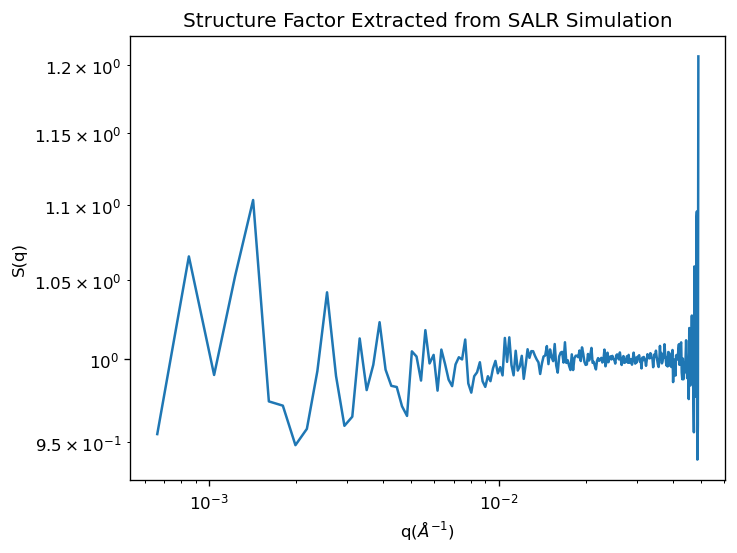

In [8]:
plt.figure(dpi=120)
plt.loglog(q[3:-1]/100, s22[3:-1], label = "SAXS curve")
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('S(q)')
plt.title('Structure Factor Extracted from SALR Simulation')

In [14]:
au.isPoly

True

Total frames processed: 1


Text(0.5, 1.0, 'SAXS Curve Extracted from CG Simulation')

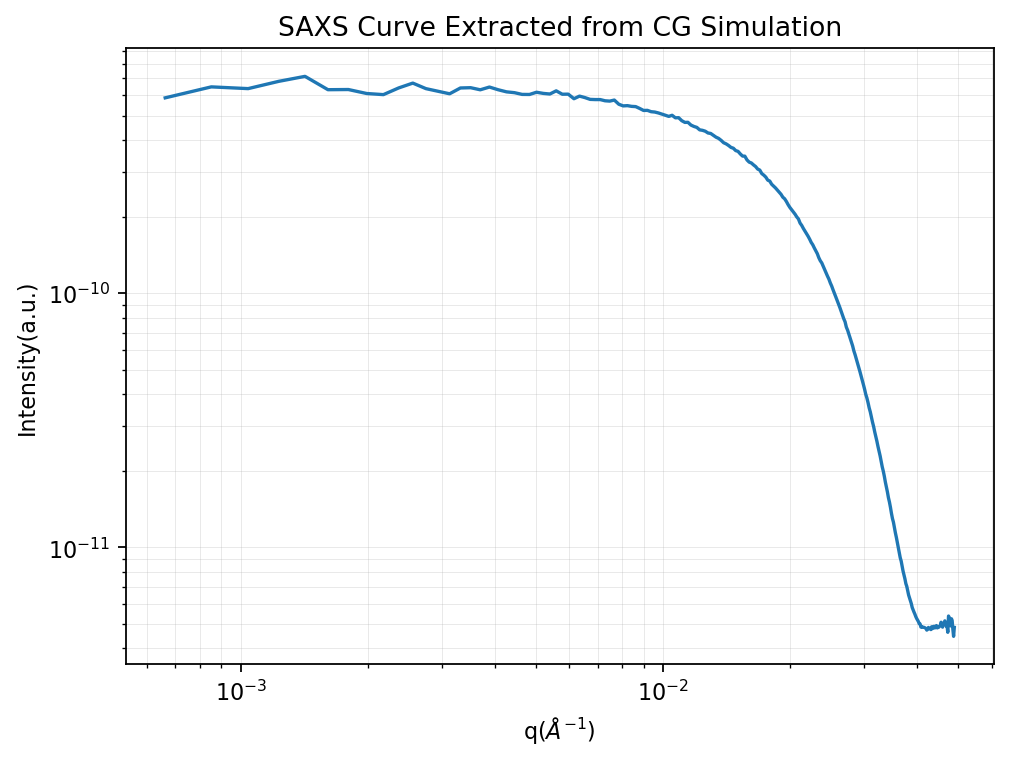

In [10]:
q, Iq = au.compute_Iq()
plt.figure(figsize=(7, 5), dpi=160)
plt.loglog(q[3:-1]/100, Iq[3:-1])
plt.xlabel('q($\AA^{-1}$)')
plt.grid(True, which='both', linewidth=0.3, alpha=0.4)
plt.ylabel('Intensity(a.u.)')
plt.title('SAXS Curve Extracted from CG Simulation')

In [11]:
au1 = SphereIntensity(volume_fraction=0.01, sld_sample=118e-6, sld_solvent=9.44e-6)
au1.set_form_factor(radius=1)
gsd = '/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/CSSAS Digital Twin/Spectra Extraction from GSD/SAXS/Bare AuNP/Poly/LR/N8000_phi0.001000_epsD7.10_delta0.25_epsY0.73_lamb2.24_poly0.10.gsd'
au1.set_structure_factor(gsd_path=gsd, N_grid=300, frames = 1)

Total frames extracted: 101


In [12]:
q1, s1 = au1.structure_factor.compute_s_1d()

Total frames processed: 1


Text(0.5, 1.0, 'Structure Factor Extracted from SALR Simulation')

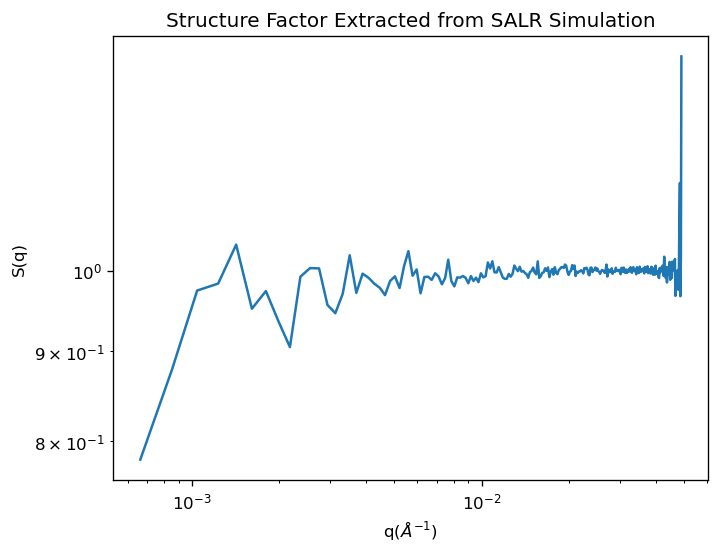

In [13]:
plt.figure(dpi=120)
plt.loglog(q1[3:-1]/100, s1[3:-1], label = "SAXS curve")
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('S(q)')
plt.title('Structure Factor Extracted from SALR Simulation')

Total frames processed: 1


Text(0.5, 1.0, 'SAXS Curve Extracted from CG Simulation')

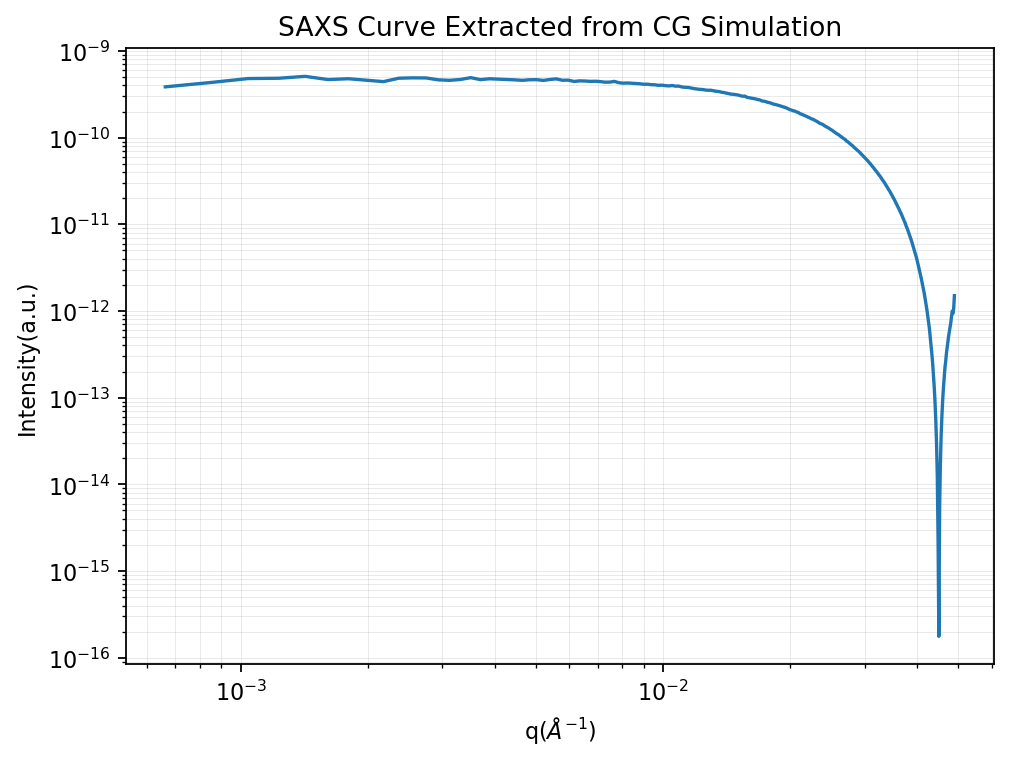

In [15]:
q1, Iq1 = au1.compute_Iq()
plt.figure(figsize=(7, 5), dpi=160)
plt.loglog(q1[3:-1]/100, Iq1[3:-1])
plt.xlabel('q($\AA^{-1}$)')
plt.grid(True, which='both', linewidth=0.3, alpha=0.4)
plt.ylabel('Intensity(a.u.)')
plt.title('SAXS Curve Extracted from CG Simulation')

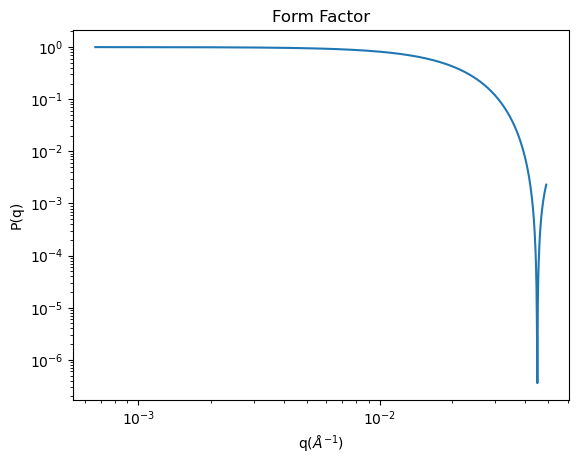

In [16]:
# Form factor of sphere is analytic, the input needs to match the one from structure factor.
p1 = au1.form_factor.Compute_Pq(q)
plt.loglog(q1[3:-1]/100,p1[3:-1])
#plt.ylim(10e-1000, 5)
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('P(q)')
plt.title('Form Factor')
plt.yscale('log')